<a href="https://colab.research.google.com/github/milindparitshinde/AI/blob/main/NN/CNN/CAR_LICENSE_PREDICTION/Conv2D_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
img_path = '/content/drive/MyDrive/Quant Masters /Ml/Project/Data_Set/images'
images = os.listdir(img_path)
images.sort()

xml_path = '/content/drive/MyDrive/Quant Masters /Ml/Project/Data_Set/annotations'
xml = os.listdir('/content/drive/MyDrive/Quant Masters /Ml/Project/Data_Set/annotations')
xml.sort()

In [ ]:
print(images)
print(xml)

['Cars0.png', 'Cars1.png', 'Cars10.png', 'Cars100.png', 'Cars101.png', 'Cars102.png', 'Cars103.png', 'Cars104.png', 'Cars105.png', 'Cars106.png', 'Cars107.png', 'Cars108.png', 'Cars109.png', 'Cars11.png', 'Cars110.png', 'Cars111.png', 'Cars112.png', 'Cars113.png', 'Cars114.png', 'Cars115.png', 'Cars116.png', 'Cars117.png', 'Cars118.png', 'Cars119.png', 'Cars12.png', 'Cars120.png', 'Cars121.png', 'Cars122.png', 'Cars123.png', 'Cars124.png', 'Cars125.png', 'Cars126.png', 'Cars127.png', 'Cars128.png', 'Cars129.png', 'Cars13.png', 'Cars130.png', 'Cars131.png', 'Cars132.png', 'Cars133.png', 'Cars134.png', 'Cars135.png', 'Cars136.png', 'Cars137.png', 'Cars138.png', 'Cars139.png', 'Cars14.png', 'Cars140.png', 'Cars141.png', 'Cars142.png', 'Cars143.png', 'Cars144.png', 'Cars145.png', 'Cars146.png', 'Cars147.png', 'Cars148.png', 'Cars149.png', 'Cars15.png', 'Cars150.png', 'Cars151.png', 'Cars152.png', 'Cars153.png', 'Cars154.png', 'Cars155.png', 'Cars156.png', 'Cars157.png', 'Cars158.png', 'Car

In [ ]:
import numpy as np
import cv2
X=[]

for image in images:
  img = cv2.imread(img_path+'/'+image)
  img = cv2.resize(img, (200,200))
  X.append(np.array(img))

In [ ]:
X = np.array(X)

In [ ]:
X.shape

(433, 200, 200, 3)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
from bs4 import BeautifulSoup

y=[]
for xml_file in xml:
  with open(xml_path + '/' + xml_file) as f:
    xml_data = f.read()
  xml_data = BeautifulSoup(xml_data, 'xml')

  width = int(xml_data.find('width').text)
  height = int(xml_data.find('height').text)

  xMax = int(xml_data.find('xmax').text)/(width/200)
  xMin = int(xml_data.find('xmin').text)/(width/200)
  yMax = int(xml_data.find('ymax').text)/(height/200)
  yMin = int(xml_data.find('ymin').text)/(height/200)

  y.append([int(xMax), int(yMax), int(xMin), int(yMin)])
  f.close()

In [ ]:
y = np.array(y)

In [ ]:
y.shape

(433, 4)

In [ ]:
type(y)

numpy.ndarray

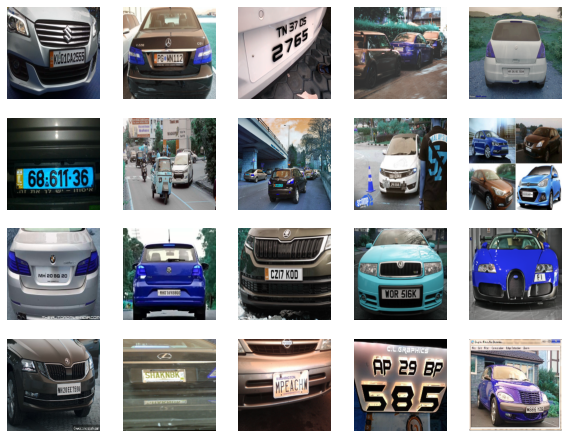

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,20))
for i in range(0,20) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

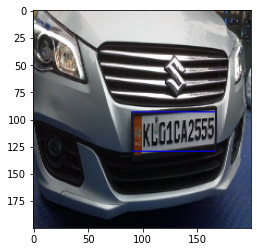

In [ ]:
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

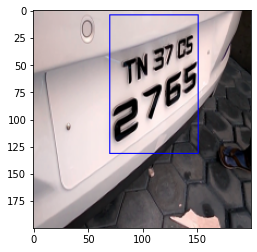

In [ ]:
image = cv2.rectangle(X[2],(y[2][0],y[2][1]),(y[2][2],y[2][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

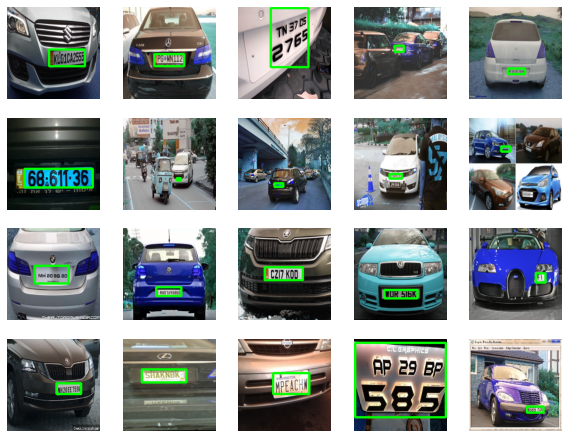

In [ ]:
plt.figure(figsize=(10,20))
for i in range(0,20) :
    plt.subplot(10,5,i+1)
    img = cv2.rectangle(X[i],(y[i][0],y[i][1]),(y[i][2],y[i][3]),(0, 255, 0),3)
    plt.axis('off')
    plt.imshow(img)

In [ ]:
# Normalization

X = X/255
y = y/255

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=2022)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(346, 200, 200, 3)
(87, 200, 200, 3)
(346, 4)
(87, 4)


# CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
cnn_model = Sequential()
cnn_model.add(Conv2D(32,(3,3),activation='relu',input_shape = (200,200,3)))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(250,activation = 'relu'))
cnn_model.add(Dense(4,activation = 'softmax'))

In [ ]:
cnn_model.compile(loss = 'categorical_crossentropy',optimizer = 'sgd',
                  metrics = ['accuracy'])

In [ ]:
model_fit_data = cnn_model.fit(x_train,y_train,batch_size = 128,
              epochs = 20,validation_split = 0.1)

Epoch 1/20
3/3 [==============================] - 14s 4s/step - loss: 11.6571 - accuracy: 0.4341 - val_loss: 84.6942 - val_accuracy: 0.0000e+00
Epoch 2/20
3/3 [==============================] - 12s 3s/step - loss: 77.9104 - accuracy: 0.2251 - val_loss: 709.9943 - val_accuracy: 0.4571
Epoch 3/20
3/3 [==============================] - 10s 3s/step - loss: 8330.8945 - accuracy: 0.4212 - val_loss: 2.9326 - val_accuracy: 0.0000e+00
Epoch 4/20
3/3 [==============================] - 10s 3s/step - loss: 2.8443 - accuracy: 0.0000e+00 - val_loss: 2.9756 - val_accuracy: 0.0000e+00
Epoch 5/20
3/3 [==============================] - 10s 3s/step - loss: 2.9817 - accuracy: 0.0000e+00 - val_loss: 3.1660 - val_accuracy: 0.0000e+00
Epoch 6/20
3/3 [==============================] - 10s 3s/step - loss: 3.2504 - accuracy: 0.0000e+00 - val_loss: 4.0425 - val_accuracy: 0.0000e+00
Epoch 7/20
3/3 [==============================] - 10s 3s/step - loss: 3.8155 - accuracy: 0.0740 - val_loss: 10.6596 - val_accuracy: 

In [ ]:
loss, accuracy = cnn_model.evaluate(x_test,y_test)

3/3 [==============================] - 1s 283ms/step - loss: 3.8533 - accuracy: 0.0115


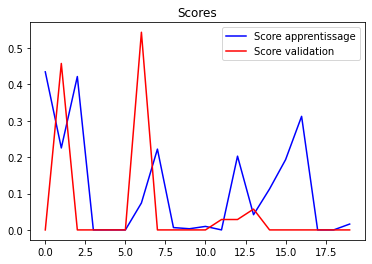

In [ ]:
accuracy = model_fit_data.history['accuracy']
val_accuracy = model_fit_data.history['val_accuracy']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
plt.plot(epochs, val_accuracy, 'r', label='Score validation')
plt.title('Scores')
plt.legend()
plt.show()